# Green general
## Implementación de la ténica discutida con Boris
En este código se programa de forma general el método de Green con sus respectivas condiciones iniciales
## Paquetes esenciales

In [1]:
%matplotlib inline
from __future__ import division
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as syp
syp.init_printing(use_unicode=True)

## Preparación del sistema

In [2]:
##Comparando con elvis
N=6

##############Energías propias
omega_s1=1*2*np.pi#punto 1
omega_s2=1*2*np.pi#punto 2
omega_c=1*2*np.pi #cavidad
################# Acoples entre sistemas
g1=0.1*2*np.pi
g2=0.0*2*np.pi
g12=0.0*2*np.pi
#####################Terminos de Liuvilliano

kappa=0.2#discipacion de cavidad
gamma1=0.2#discipación punto 1
gamma2=0.2#discipación punto 2

Pc=0.0 #bombeo de la cavidad
P1=0.1#bombeo del punto 1
P2=0.1#bombeo del punto 2

gphi1=0.01#perdida por decoherencia 1
gphi2=0.01#perdida por decoherencia 1



######################
def op(N,tipo=True):
    if tipo:
        return destroy(N)
    else:
        return identity(N)
    
M=np.array([[omega_s1,g12,g1],[g12,omega_s2,g2],[g1,g2,omega_c]])
LI=np.array([2,2,N])
LOP=np.array([[op(LI[j],j==i) for j in range(len(LI))] for i in range(len(LI))])

alpha=np.array([tensor(i) for i in LOP])

sz1=tensor([sigmaz(),identity(2),identity(N)])
sz2=tensor([identity(2),sigmaz(),identity(N)])

liuv=[np.sqrt(Pc)*alpha[2].dag(),np.sqrt(P1)*alpha[0].dag(),np.sqrt(P2)*alpha[1].dag(),
      np.sqrt(kappa)*alpha[2], np.sqrt(gamma1)*alpha[0], np.sqrt(gamma2)*alpha[1],
      np.sqrt(gphi1)*sz1,np.sqrt(gphi2)*sz2]

Vd=np.dot(M,alpha)
H=np.dot([i.dag() for i in alpha],Vd)
rho_ss=steadystate(H,liuv)


In [3]:
alpha[1]

Quantum object: dims = [[2, 2, 6], [2, 2, 6]], shape = (24, 24), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.

In [4]:
rho_ss

Quantum object: dims = [[2, 2, 6], [2, 2, 6]], shape = (24, 24), type = oper, isherm = True
Qobj data =
[[  4.25820505e-01 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j]
 [  0.00000000e+00 +0.00000000e+00j   1.03135413e-01 +0

## Condición inicial

In [5]:
#sup=tensor(identity(2),identity(N))*sm
ind_op=2
sup=tensor([identity(i) for i in LI])*alpha[ind_op]
mask=(sup*H).data.todense().astype(np.bool)
PCI=np.zeros(mask.shape)#Posición de Condición Inicial
Rho_CI=np.zeros(mask.shape,dtype=complex)#matriz de Condición Inicial desplazada
PCI[mask]=1
#syp.Matrix(PCI)

In [6]:
in_f=np.prod(np.append(LI,1)[ind_op+1:])
rho_sup=rho_ss[in_f:,:]
Rho_CI[:len(rho_sup),:]=rho_sup
CI=Qobj(Rho_CI*PCI)

In [59]:
ts=2**10-1
tmax=300
dx=1/200
#times=np.linspace(0.0,ts*dx,ts+1)

times=np.linspace(0.0,tmax,ts-1)
opts=Options(nsteps=1000)

result_md=mesolve(H,CI,times,liuv,[],{},opts,True)

G=result_md.states
elem=np.array([sum(np.sqrt(i+1)*G[j][i,i+1] for i in range(N-1))+
               sum(np.sqrt(i+1)*G[j][N+i,N+i+1] for i in range(N-1)) for j in range(ts-1)])
elemr=elem.real
elemi=elem.imag

10.1%. Run time:   0.10s. Est. time left: 00:00:00:00
20.1%. Run time:   0.20s. Est. time left: 00:00:00:00
30.0%. Run time:   0.30s. Est. time left: 00:00:00:00
40.0%. Run time:   0.40s. Est. time left: 00:00:00:00
50.0%. Run time:   0.49s. Est. time left: 00:00:00:00
60.1%. Run time:   0.58s. Est. time left: 00:00:00:00
70.1%. Run time:   0.68s. Est. time left: 00:00:00:00
80.0%. Run time:   0.77s. Est. time left: 00:00:00:00
90.0%. Run time:   0.87s. Est. time left: 00:00:00:00
Total run time:   0.96s


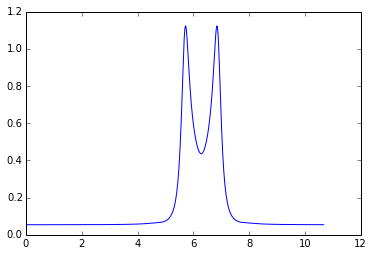

In [60]:
#c_ops=[np.sqrt(Pa)*a.dag(),np.sqrt(P)*sm.dag(),np.sqrt(kappa)*a,np.sqrt(gamma)*sm,np.sqrt(gphi)*sz]
#corra=correlation_2op_1t(H,None,times,c_ops,a.dag(),a)#,options=opts1)
#wlista,speca= spectrum_correlation_fft(times,corra)

wlista1,speca1= spectrum_correlation_fft(times,elem)
#plt.xlim(982,1010)
plt.plot(wlista1,abs(speca1))

In [11]:
1/1.6

In [13]:
2**8-1